<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [1]:
student_number = 403210725
full_name = "Farzan Rahmani"
assert student_number and full_name is not None, 'please input your information'

In [2]:
print(f"student number: {student_number}")
print(f"full name: {full_name}")

student number: 403210725
full name: Farzan Rahmani


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [4]:
# todo
df = pd.read_csv('dataset.csv')
print("First few rows of the dataset:\n")
print(df.head())

First few rows of the dataset:

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1   

Display dataset information.

In [5]:
# todo
print("Dataset Info:\n")
print(df.info())
print("\n\nMissing values:\n")
print(df.isnull().sum())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int6

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: ***CUST_ID is the most irrelevant feature for PCA and clustering because it's just an identifier and doesn't provide any meaningful information about customer behavior or patterns. It is a unique identifier with no numerical significance in clustering.***

In [6]:
# Exclude irrelevant feature
df = df.drop('CUST_ID', axis=1)
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer: ***We can use mean or median imputation, But we used median imputation for missing values because:***
- The median is less sensitive to outliers than the mean
- It preserves the distribution of the data better than mode imputation
- It's more appropriate than deletion since we have a relatively small dataset


In [7]:
#Fill missing data

# We could fill missing data with the mean of the column to prevent introducing bias while keeping most information.
# data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
# data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean())

# But we'll use median imputation since mean could be affected by outliers
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [8]:
print("Missing values:\n")
print(df.isnull().sum())

Missing values:

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


plot the correlation matrix and identify redundant features. remove them from the dataframe.

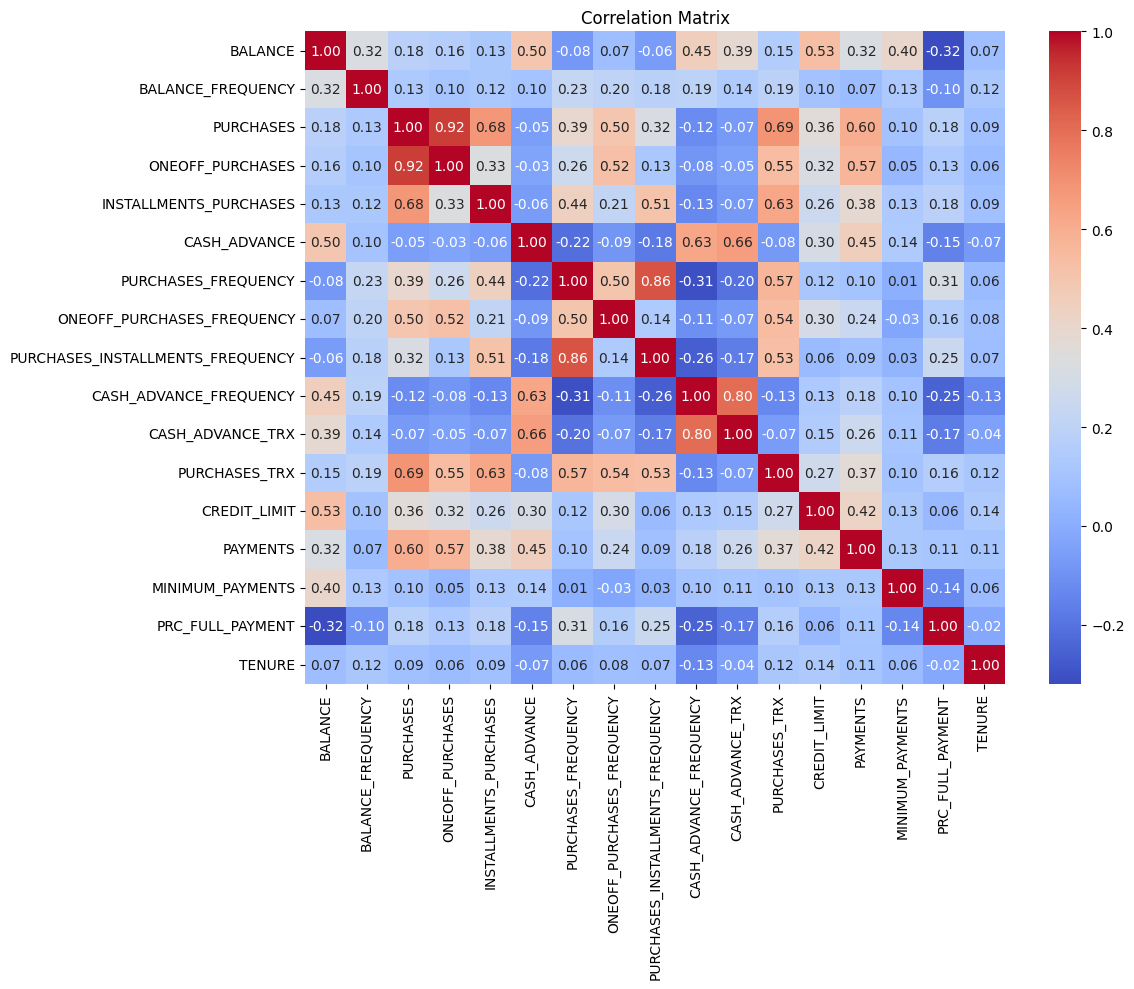

In [9]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [10]:
# Identify and remove redundant features. use 0.8 threshold.
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_features = {column for column in upper.columns if any(upper[column] > 0.8)}
print("Redundant features:", redundant_features)

Redundant features: {'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'}


In [11]:
df.drop(redundant_features, axis=1, inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [12]:
# todo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.132643,-0.466786,1.269843,-0.678661,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.122823,-0.466786,1.269843,-0.678661,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.294893,-0.466786,0.854576,-0.678661,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.454576,-0.449352,-1.221758,-0.678661,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


Why is it important to standardize the data before applying PCA?
<br>
Answer: Standardizing ensures that each feature contributes equally to the distance calculations, which is essential for PCA and clustering. In more details, Standardization is crucial before PCA because:
- PCA is sensitive to the scale of features
- Features with larger scales would dominate the principal components
- Standardization ensures all features contribute equally to the analysis
- It makes the eigenvalues comparable across features

What is difference between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:
- StandardScaler: Transforms features to have zero mean and unit variance (z-score normalization)
- Normalizer: Scales samples individually to have unit norm

StandardScaler is better for PCA because:
- It preserves the relative differences between features
- It doesn't distort the relationships between variables
- It makes features comparable while maintaining their original distribution shape

In other words: Normalizer scales each sample to unit norm, while StandardScaler scales each feature to zero mean and unit variance. StandardScaler is preferred for PCA since it standardizes across features.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [13]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Calculate covariance matrix
        covariance_matrix = np.cov(X_centered.T)

        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Store components and explained variance ratio
        if self.n_components is None:
            self.n_components = X.shape[1]

        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance_ratio = eigenvalues[:self.n_components] / np.sum(eigenvalues)

        return self


    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Return the transformed data
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: ***Number of components needed to explain 75% of variance: 6***

Based on the cumulative explained variance plot, we typically need around 6 components to explain 75% of the variance in this dataset.

In [14]:
# Apply PCA
pca = CustomPCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.get_explained_variance_ratio()
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio * 100

array([ 25.41082966,  47.66170256,  56.37562763,  63.89994773,
        70.46999229,  76.0580038 ,  81.40161973,  85.74535317,
        89.48754502,  92.55034776,  94.56979533,  96.25047647,
        97.83715384,  99.00009161, 100.        ])

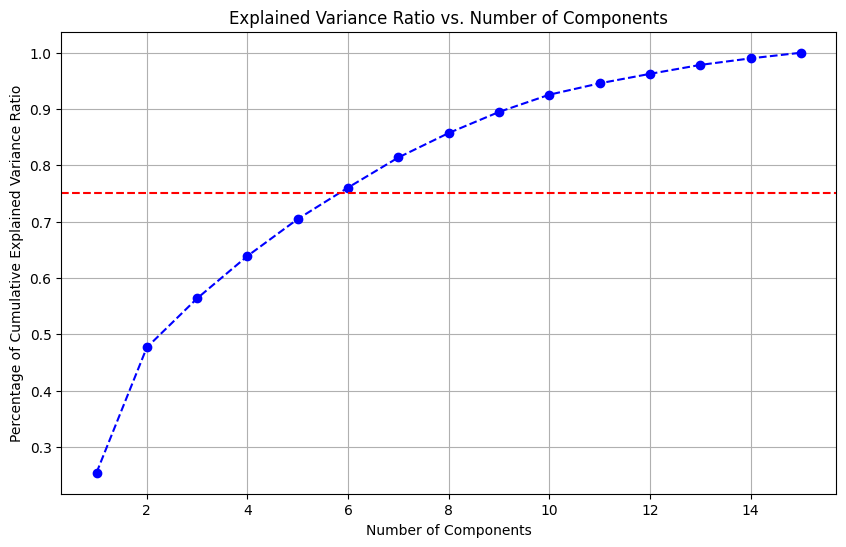

In [15]:
# todo
# Plot cumulative variance
plt.figure(figsize=(10, 6))

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo--')
plt.axhline(y=0.75, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [16]:
# Select number of components that explain 75% of variance
n_components = np.sum(cumulative_variance_ratio <= 0.75) + 1
print(f"Number of components needed to explain 75% of variance: {n_components}")

Number of components needed to explain 75% of variance: 6


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [17]:
#Build a new DataFrame with the first slected components

# Create PCA with selected components
n_components = 5 # 6 for 75%
pca_final = CustomPCA(n_components=n_components)
pca_final.fit(X_scaled)
X_pca = pca_final.transform(X_scaled)

# Create DataFrame with PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca.to_csv('pca_output.csv', index=False)
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

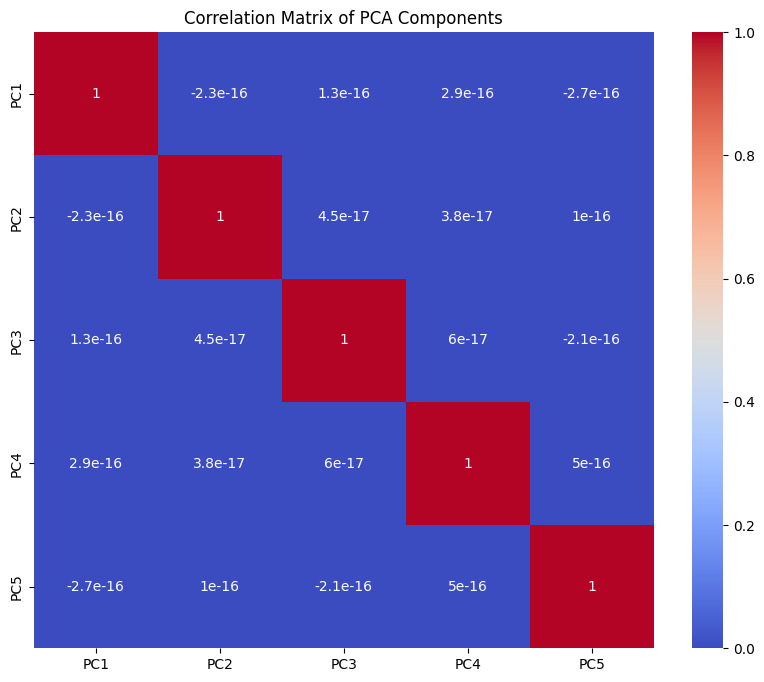

In [18]:
# todo

# Check correlation between PCA components
plt.figure(figsize=(10, 8))
sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PCA Components')
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [19]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """

        # Set random state
        np.random.seed(self.random_state)

        # Randomly initialize centroids
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Assign points to nearest centroid
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            new_labels = np.argmin(distances, axis=0)

            # Check for convergence
            if hasattr(self, 'labels_') and np.all(self.labels_ == new_labels):
                break

            self.labels_ = new_labels

            # Update centroids
            for k in range(self.n_clusters):
                if np.sum(self.labels_ == k) > 0:  # Avoid empty clusters
                    self.centroids[k] = np.mean(X[self.labels_ == k], axis=0)

        # Calculate inertia
        self.inertia_ = self._calculate_inertia(X)

        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        distances = np.sqrt(((X - self.centroids[self.labels_])**2).sum(axis=1))
        # Step 2: Sum all squared distances to compute inertia
        return np.sum(distances**2)


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

Looking at the elbow curve, the optimal number of clusters appears to be around 5, where:
- The curve shows a "elbow" point.
- additional clusters don't significantly reduce the WCSS.
- The clustering solution remains interpretable.

In [20]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(X_pca)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

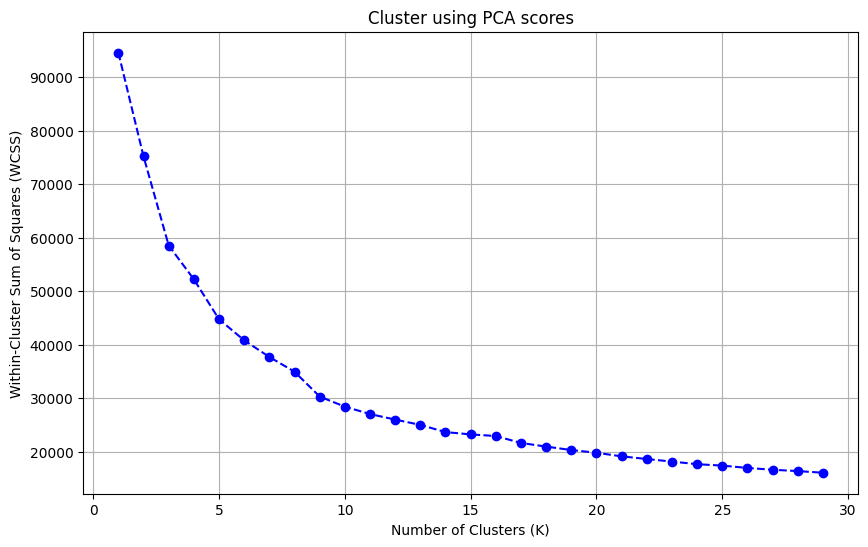

In [21]:
# Plot the Elbow curve using Matplotlib

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, 'bo--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Cluster using PCA scores')
plt.grid(True)
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [22]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
optimal_k = 5  # Based on elbow curve
kmeans = CustomKMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)

In [23]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
df_pca['segment'] = kmeans.labels_
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,segment
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766,2
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456,1
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626,3
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452,2
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049,2


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

<Figure size 1400x1400 with 0 Axes>

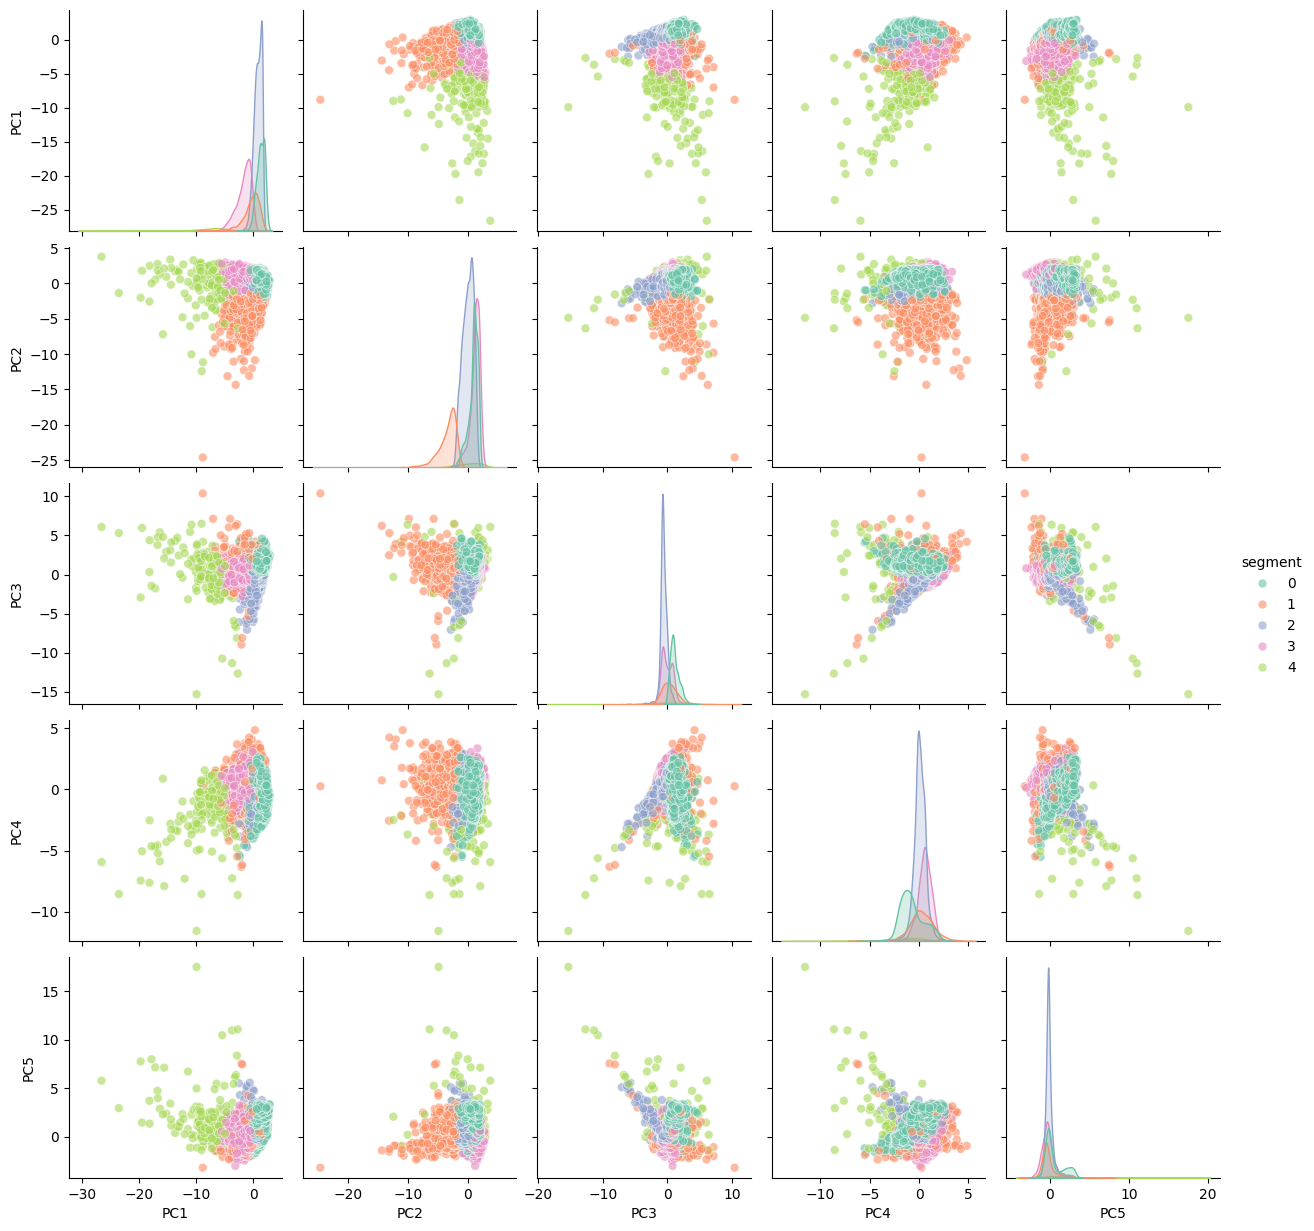

In [24]:
# todo
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_df['segment'] = kmeans.labels_

plt.figure(figsize=(14, 14))
sns.pairplot(
    pca_df,
    hue='segment',
    palette='Set2',
    diag_kind='kde',
    height=2.5,
    plot_kws={'alpha': 0.6, 's': 40}
)

plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


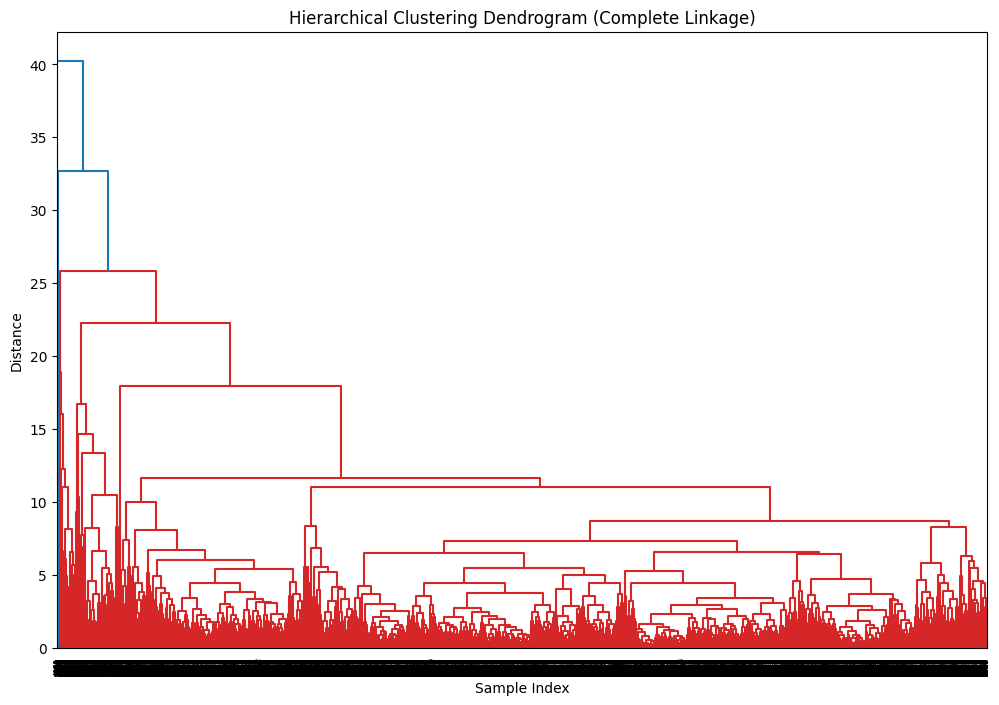

In [25]:
# Perform Hierarchical Clustering on the pca dataset
Z = linkage(X_pca, method='complete')

# Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

<Figure size 1400x1400 with 0 Axes>

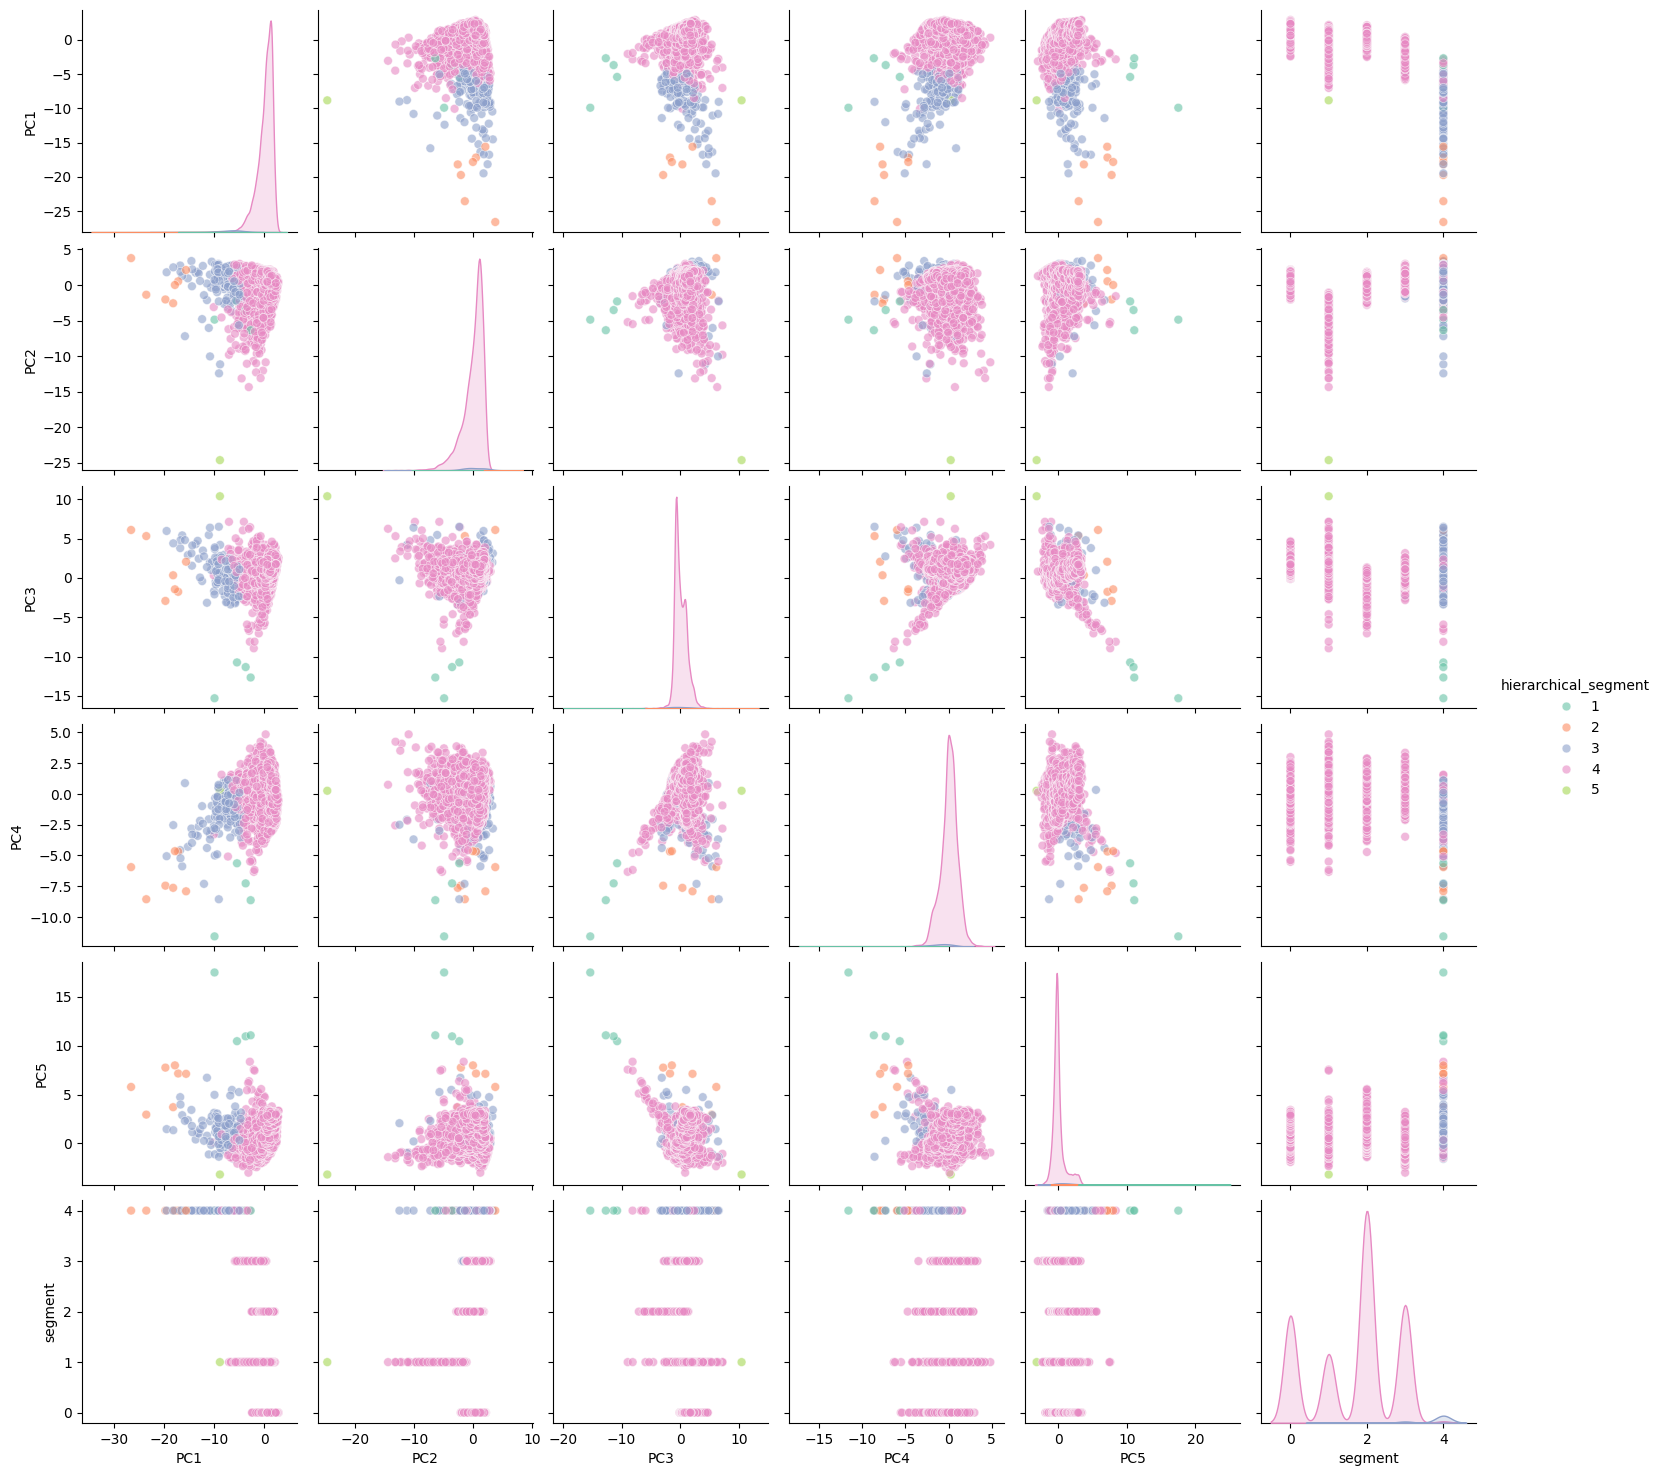

In [26]:
# Choose threshold and assign clusters
hierarchical_labels = fcluster(Z, 5, criterion='maxclust')

# Assign cluster labels to PCA DataFrame
df_pca['hierarchical_segment'] = hierarchical_labels

# Visualize using PCA components
plt.figure(figsize=(14, 14))
sns.pairplot(
    df_pca,
    hue='hierarchical_segment',  # Change 'hierarchical_segment' if you want to see different clusters
    palette='Set2',
    diag_kind='kde',
    height=2.5,
    plot_kws={'alpha': 0.6, 's': 40}
)

plt.show()